In [1]:
import numpy as np
import matplotlib.pyplot as plt
from grid import *
from consts import *
import time
from params import *
from load import *
from celluloid import Camera
from simulation import *
from initial_conditions import *

In [2]:
def analytic_solution(M0, R0, NU, t):
    def func(r):
        x = r/R0
        tau = 12*NU*t/R0/R0
        retval = M0/np.pi/R0**2/tau*x**-0.25*np.exp(-(1+x**2)/tau)*iv(0.25, 2*x/tau)
        retval = np.where(np.logical_or(np.isnan(retval), np.isinf(retval)), 0, retval)
        return retval
    return func

In [3]:
MBH=1e6*MSUN
MSTAR=MSUN
NU = 1e-10*c*1e13
params = Params(SIM_DIR="", TOL=5e-3, NR=128, MBH=MBH, EOS_TABLE="EOS_HIGH_RES", MSTAR=MSTAR, GEOMETRY="LINEAR", FSH=0.5, FWIND=1, TF=1*MONTH, CONST_NU=NU, EVOLVE_ENTROPY=False, WIND_ON=False, FB_ON=False, SAVE=False, R0=5, RF=50)

R0=params.RT
tvisc = R0**2/NU


grid=Grid(params=params)
sigma0 = analytic_solution(MSTAR, R0, NU, 0.001*tvisc)(grid.r_cell)
sigmacrit = 1e-6*np.max(sigma0)
sigma0 = np.where(sigma0<sigmacrit, sigmacrit, sigma0)
entropy0 = 1e13*grid.cell_ones()

params.T0=0.0001*tvisc
params.TF=0.02*tvisc

sim = Simulation(sigma0, entropy0, params=params)
sim.evolve()

/Users/dcarrel/Desktop/ftcs/variable.py:83: RuntimeWarning: divide by zero encountered in divide
  self.sigma_dt = np.abs(self.sigma/self.sigma_dot)
/Users/dcarrel/Desktop/ftcs/variable.py:83: RuntimeWarning: divide by zero encountered in divide
  self.sigma_dt = np.abs(self.sigma/self.sigma_dot)


pct: 100.08%	dt=1.17e-03	cfl	loc=9.77	sig 4.31e-03	ts 0.00e+00					

(1, 60190788.43254561)

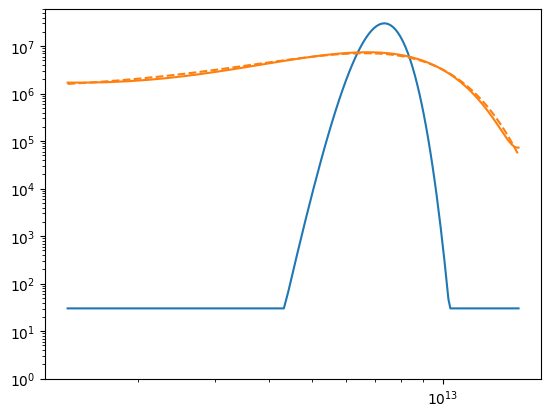

In [6]:
sigmaf = analytic_solution(MSTAR, R0, NU, params.TF)(grid.r_cell)
plt.loglog(grid.r_cell, sigma0, color="tab:blue")
plt.loglog(grid.r_cell, sigmaf, color="tab:orange", linestyle="--")
plt.loglog(grid.r_cell, sim.var0.sigma, color="tab:orange")

plt.ylim(bottom=1)